In [8]:
from qiskit import QuantumCircuit, qiskit, Aer
from math import sqrt

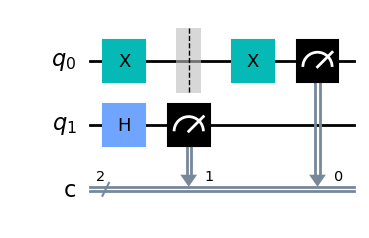

In [7]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.barrier(0)
qc.x(0)
qc.h(1)
qc.measure([0, 1], [0, 1])
qc.draw('mpl')

In [9]:
sv_array = [1/sqrt(2), 1/sqrt(2)]
qc.initialize(sv_array, 0)

In [12]:
backend = Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend=backend, shots=1024)
result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.11.1', qobj_id='5441854d-ffb9-4855-8611-c9a2ffcf4c65', job_id='ce1b90b5-465e-46bf-b5cd-ba3de58c4b4f', success=True, results=[ExperimentResult(shots=10, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 8, '0x2': 2}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-90', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=945915434, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 4.09e-05, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': False}}, time_taken=0.0002232)], date=2022-11-26T20:21:44.870336, status=COMPLETE

In [13]:
job = qiskit.execute(qc, backend=backend, shots=10, memory=True )
result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.11.1', qobj_id='090c08cf-5644-4b60-b2d1-3ac2dc64b54c', job_id='fa2f7b4b-e14b-48d2-9d25-b9439ff59cba', success=True, results=[ExperimentResult(shots=10, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 5, '0x2': 5}, memory=['0x0', '0x2', '0x2', '0x0', '0x2', '0x2', '0x0', '0x0', '0x0', '0x2']), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-90', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2005825751, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 6.55e-05, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': F

In [26]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
job = qiskit.execute(qc, backend=backend, shots=1024)
result = job.result()
plot_histogram(result.get_counts())

QiskitError: 'No counts for experiment "0"'

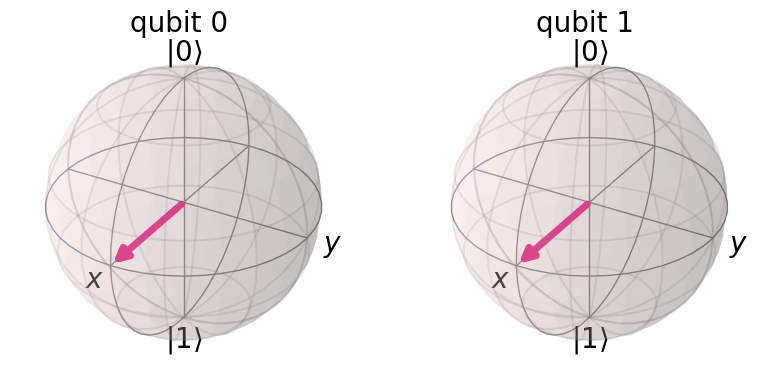

In [23]:
qc = QuantumCircuit(2)
sv_array = [1/sqrt(4), 1/sqrt(4), 1/sqrt(4), 1/sqrt(4)]
qc.initialize(sv_array, [0, 1])

backend = Aer.get_backend('statevector_simulator')
job = qiskit.execute(qc, backend=backend, shots=1024)
sv = job.result().get_statevector(qc)
plot_bloch_multivector(sv)

In [27]:
qc = QuantumCircuit(2)
qc.cx(1,0)
backend = Aer.get_backend('unitary_simulator')
job = qiskit.execute(qc, backend=backend, shots=1024)
u_mat = job.result().get_unitary(qc)
print(u_mat)
array_to_latex(u_mat)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


<IPython.core.display.Latex object>